# Lab 12 Clustering

## PSU DS 200 Fall 2020

### Instructor: Professor John Yen
### TA: Rupesh Prajapati
### LA: Nathan Tack

## Acknnowledgement: 
Part of this lab uses datascience module developed by UC Berkeley data 8 course.

## Total 9 Exercises:
- Exercise 1: 5 points
- Exercies 2: 5 points
- Exercise 3: 10 points
- Exercise 4: 5 points
- Exercise 5: 10 points
- Exercise 6: 5 points
- Exercise 7: 10 points
- Exercise 8: 10 points
- Exercise 9: 10 points

## Total 70 points

## Due: 5 pm Nov 18th

# Learning Objectives of the Lab
- Be able to use k-means clustering in sklearn to cluster a dataset.
- Be able to understand the implication of adjusting the number of clusters (k) for clustering data.
- Be able to visualize the result of clustering
- Be able to obtain cluster centers/centroids generated by k-means clustering.


In [1]:
import numpy as np
from datascience import *
from sklearn.cluster import KMeans

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy Data Files into DS200Labs in your Google Drive

Like the previous labs, download the following data files from Canvas, upload them to DS200Labs in your Google Drive.
- IRIS.csv

After you have done this, run the following "ls" command to make sure this data files is in your DS200Labs directory.  If not, carefully repeat the steps in uploading the file to DS200Labs (review these steps in Lab 1 if needed)

In [3]:
!ls /content/drive/My\ Drive/DS200Labs

baby.csv				  IMDB5000movies.csv
BC_10_2					  IRIS.csv
BC_10_2.pdf				  player_data.csv
Ben-NE-9-10-2015-pass-6.csv		  salary_data.csv
Ben_Pass_5_2				  SFSalaries2011_2014.csv
Ben_Pass_5_2.pdf			  station.csv
breast-cancer-wisconsin-data-windCSV.csv  trip.csv
BreatCancerFinal.csv			  Tweets
faithful.csv


# Exercise 1 (5 points)
Complete the following code to read the IRIS.csv file from your DS200Labs folder in your Google Drive.

In [4]:
path = '/content/drive/My Drive/DS200Labs/IRIS.csv'
iris = Table.read_table(path)
iris.show(10)

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


## Histogram of different groups

Tables of datascience module provide a histogram drawing method that can draw multiple histograms by grouping the data on a particualr column.  For example, the following code
```
iris.hist('petal_width', group='species')
```
generates three colored histograms of petal_width in the "iris" table based on the subtype of iris flower they each belong to.


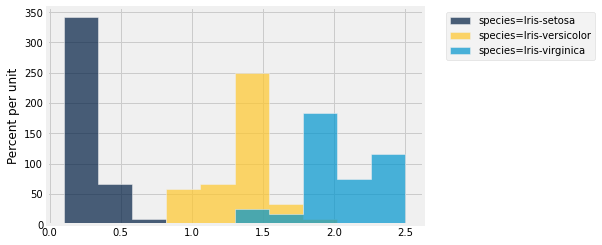

In [5]:
iris.hist('petal_width', group='species')

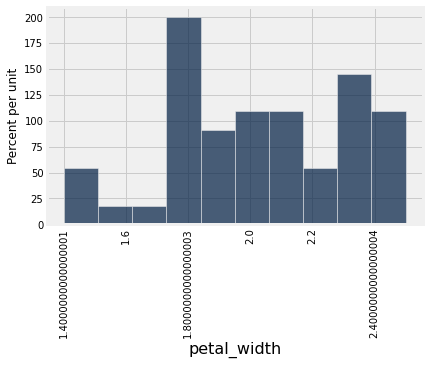

In [6]:
iris.where('species', are.equal_to('Iris-virginica')).hist('petal_width', bins=10)

# Exercise 2 (5 points)

Generate a histogram of three other features grouped by the subtype of iris flowers they belong to.

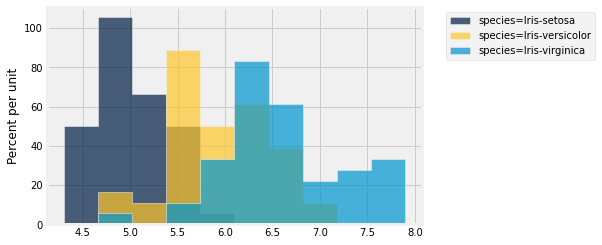

In [7]:
iris.hist('sepal_length', group='species')

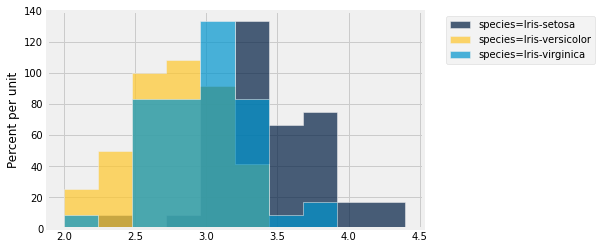

In [8]:
iris.hist('sepal_width', group = 'species')

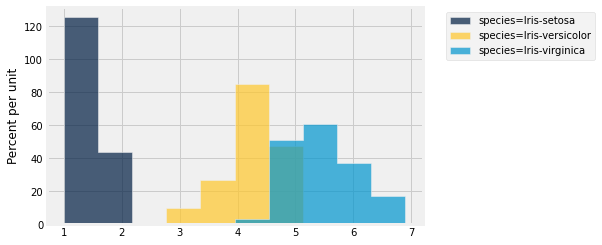

In [9]:
iris.hist('petal_length', group = 'species')

# Three Types of IRIS Flowers

The iris dataset contains data about three types of iris flowers. The dataset was 
initially made available through University
of California, Irvine's Machine Learning 
Repository. The dataset has been used by many
machine learning researchers and educators
due to the small number of features (only four features involved) involved, and the ease
of understanding the problem.  You can follow
the links below to understand the three types
of iris flowers, which are the values of the "species" column in the data.  

IRIS dataset is commonly used for supervised machine learning (i.e., for predicting the subcategory that an iris flower belongs to).  However, we use it for clustering (unsupervised machine learning) in this lab. One benefit of using this dataset for clustering is we can compare the result of the clustering only features (not the "species") with their species to see how well iris flowers in the same species are grouped together.

## Setosa
[Wikipedia description of Setosa](https://en.wikipedia.org/wiki/Iris_setosa)

## Versieolor
[Wikipedia description of Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)

## Virginica
[Wikipedia description of Virginica](https://en.wikipedia.org/wiki/Iris_virginica)

# Features of IRIS Dataset

The IRIS dataset contains four features about flowers, which are used to classify iris flowers into three subtypes listed above.  The four features are listed below.

## Petal width and length

[Wikipedia description of Petal](https://en.wikipedia.org/wiki/Petal)

## Sepal width and length

[Wikipedia description of Sepal](https://en.wikipedia.org/wiki/Sepal)

# Prepare data for clustering

Because the IRIS dataset includes class lables (i.e., the type of iris flowers) under the column "species", we will first drop this column to create a dataset without such lables for clustering.


In [10]:
iris2=iris.drop("species")
iris2.show(10)

sepal_length,sepal_width,petal_length,petal_width
5.1,3.5,1.4,0.2
4.9,3,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


In [11]:
iris_DF = iris2.to_df()
print(iris_DF)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [12]:
iris_array=iris_DF.to_numpy()
print(iris_array)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# K-means Clustering

# Exercise 3 (10 points)

Fill in the number of clusters for a KMeans object in sklearn. Recommended number: 3.

In [13]:
km = KMeans(
    n_clusters= 3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [14]:
km.fit(iris_array)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [15]:
clusters = km.predict(iris_array)
print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


# Add Cluster Results to the IRIS Table

# Exercise 4 (5 points)

Add a new column "kMeans Clustering Result" to the IRIS table to store the clustering result for each rows. We create three tables, one for each cluster generated by the k-means clustering.

In [16]:
iris_C = iris.with_column("kMeans Clustering Result", clusters)
iris_C0 = iris_C.where("kMeans Clustering Result", are.equal_to(0))
iris_C1 = iris_C.where("kMeans Clustering Result", are.equal_to(1))
iris_C2 = iris_C.where("kMeans Clustering Result", are.equal_to(2))
iris_C2.show(10)

sepal_length,sepal_width,petal_length,petal_width,species,kMeans Clustering Result
5.1,3.5,1.4,0.2,Iris-setosa,2
4.9,3,1.4,0.2,Iris-setosa,2
4.7,3.2,1.3,0.2,Iris-setosa,2
4.6,3.1,1.5,0.2,Iris-setosa,2
5,3.6,1.4,0.2,Iris-setosa,2
5.4,3.9,1.7,0.4,Iris-setosa,2
4.6,3.4,1.4,0.3,Iris-setosa,2
5,3.4,1.5,0.2,Iris-setosa,2
4.4,2.9,1.4,0.2,Iris-setosa,2
4.9,3.1,1.5,0.1,Iris-setosa,2


# Exercise 5 (10 points)

Obtain clustering centers from the k-means clustering object (created in Exercise 3) using "cluster_centers_", which is a variable assocaited with a k-means object that stores the clustering centers/centroids.

In [17]:
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]]


# Transform Table of Clusters to Array

To prepare for visualizing the clustering results, we transform the IRIS data in each cluster into an array.

In [18]:
iris_C0_df = iris_C0.to_df()
iris_C0_array = iris_C0_df.to_numpy()
print(iris_C0_array)

[[7.0 3.2 4.7 1.4 'Iris-versicolor' 0]
 [6.4 3.2 4.5 1.5 'Iris-versicolor' 0]
 [5.5 2.3 4.0 1.3 'Iris-versicolor' 0]
 [6.5 2.8 4.6 1.5 'Iris-versicolor' 0]
 [5.7 2.8 4.5 1.3 'Iris-versicolor' 0]
 [6.3 3.3 4.7 1.6 'Iris-versicolor' 0]
 [4.9 2.4 3.3 1.0 'Iris-versicolor' 0]
 [6.6 2.9 4.6 1.3 'Iris-versicolor' 0]
 [5.2 2.7 3.9 1.4 'Iris-versicolor' 0]
 [5.0 2.0 3.5 1.0 'Iris-versicolor' 0]
 [5.9 3.0 4.2 1.5 'Iris-versicolor' 0]
 [6.0 2.2 4.0 1.0 'Iris-versicolor' 0]
 [6.1 2.9 4.7 1.4 'Iris-versicolor' 0]
 [5.6 2.9 3.6 1.3 'Iris-versicolor' 0]
 [6.7 3.1 4.4 1.4 'Iris-versicolor' 0]
 [5.6 3.0 4.5 1.5 'Iris-versicolor' 0]
 [5.8 2.7 4.1 1.0 'Iris-versicolor' 0]
 [6.2 2.2 4.5 1.5 'Iris-versicolor' 0]
 [5.6 2.5 3.9 1.1 'Iris-versicolor' 0]
 [5.9 3.2 4.8 1.8 'Iris-versicolor' 0]
 [6.1 2.8 4.0 1.3 'Iris-versicolor' 0]
 [6.3 2.5 4.9 1.5 'Iris-versicolor' 0]
 [6.1 2.8 4.7 1.2 'Iris-versicolor' 0]
 [6.4 2.9 4.3 1.3 'Iris-versicolor' 0]
 [6.6 3.0 4.4 1.4 'Iris-versicolor' 0]
 [6.8 2.8 4.8 1.4 'Iris-v

In [19]:
iris_C1_df = iris_C1.to_df()
iris_C1_array = iris_C1_df.to_numpy()
iris_C2_df = iris_C2.to_df()
iris_C2_array = iris_C2_df.to_numpy()
print(iris_C2_array)

[[5.1 3.5 1.4 0.2 'Iris-setosa' 2]
 [4.9 3.0 1.4 0.2 'Iris-setosa' 2]
 [4.7 3.2 1.3 0.2 'Iris-setosa' 2]
 [4.6 3.1 1.5 0.2 'Iris-setosa' 2]
 [5.0 3.6 1.4 0.2 'Iris-setosa' 2]
 [5.4 3.9 1.7 0.4 'Iris-setosa' 2]
 [4.6 3.4 1.4 0.3 'Iris-setosa' 2]
 [5.0 3.4 1.5 0.2 'Iris-setosa' 2]
 [4.4 2.9 1.4 0.2 'Iris-setosa' 2]
 [4.9 3.1 1.5 0.1 'Iris-setosa' 2]
 [5.4 3.7 1.5 0.2 'Iris-setosa' 2]
 [4.8 3.4 1.6 0.2 'Iris-setosa' 2]
 [4.8 3.0 1.4 0.1 'Iris-setosa' 2]
 [4.3 3.0 1.1 0.1 'Iris-setosa' 2]
 [5.8 4.0 1.2 0.2 'Iris-setosa' 2]
 [5.7 4.4 1.5 0.4 'Iris-setosa' 2]
 [5.4 3.9 1.3 0.4 'Iris-setosa' 2]
 [5.1 3.5 1.4 0.3 'Iris-setosa' 2]
 [5.7 3.8 1.7 0.3 'Iris-setosa' 2]
 [5.1 3.8 1.5 0.3 'Iris-setosa' 2]
 [5.4 3.4 1.7 0.2 'Iris-setosa' 2]
 [5.1 3.7 1.5 0.4 'Iris-setosa' 2]
 [4.6 3.6 1.0 0.2 'Iris-setosa' 2]
 [5.1 3.3 1.7 0.5 'Iris-setosa' 2]
 [4.8 3.4 1.9 0.2 'Iris-setosa' 2]
 [5.0 3.0 1.6 0.2 'Iris-setosa' 2]
 [5.0 3.4 1.6 0.4 'Iris-setosa' 2]
 [5.2 3.5 1.5 0.2 'Iris-setosa' 2]
 [5.2 3.4 1.4 0.2 'I

# Visualizing Clustering Results

# Exercise 6 (10 points)

Plot the three clusters along sepal length (column index 0 in iris_array) and sepal width (column index 1 in iris_array) by choosing three different colors.  Examples of color include: 

- "b": blue
- "g": green
- "r": red
- "yellow": yellow
- "orange": orange
- "purple": purple
- "black": black

Aditional colors can be found at
https://matplotlib.org/3.3.2/gallery/color/named_colors.html


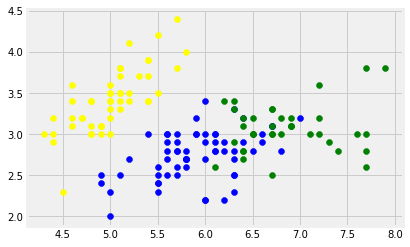

In [24]:
plots.scatter(iris_C0_array[:,0], iris_C0_array[:,1], color="b")
plots.scatter(iris_C1_array[:,0], iris_C1_array[:,1], color="g")
plots.scatter(iris_C2_array[:,0], iris_C2_array[:,1], color="yellow")
plots.show()

# Exercise 7 (10 points)

Add three cluster centers to the plots above.
We have saved cluster centers in a variable called "centers".

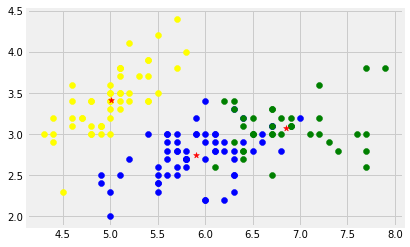

In [25]:
plots.scatter(iris_C0_array[:,0], iris_C0_array[:,1], color="b")
plots.scatter(iris_C1_array[:,0], iris_C1_array[:,1], color="g")
plots.scatter(iris_C2_array[:,0], iris_C2_array[:,1], color="yellow")
plots.scatter(centers[:,0], centers[:,1], marker='*', color='r')
plots.show()

# Exercise 8 (10 points)

Display scatter plot of the two remaining features (petal_length and petal_width) by color coding them using the cluster results. Show also the cluster centers in a color different from the one you used for the three clusters.

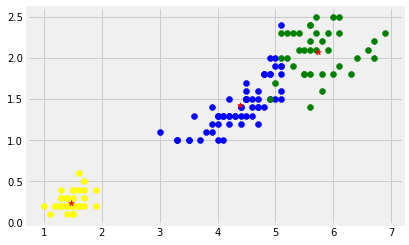

In [27]:
plots.scatter(iris_C0_array[:,2], iris_C0_array[:,3], color="b")
plots.scatter(iris_C1_array[:,2], iris_C1_array[:,3], color="g")
plots.scatter(iris_C2_array[:,2], iris_C2_array[:,3], color="yellow")
plots.scatter(centers[:,2], centers[:,3], marker='*', color='r')
plots.show()

# Exercise 9 (10 points)
Describe how the original three species of IRIS flowers are distributed in each cluster you formed.

Hint: You can plot a histogram of the k means clustering result (i.e., cluster labels) by grouping the iris_C table on the species column.

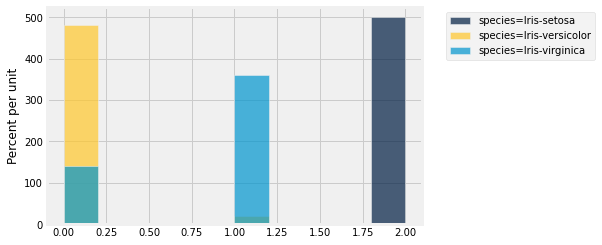

In [26]:
iris_C.hist('kMeans Clustering Result',group='species')

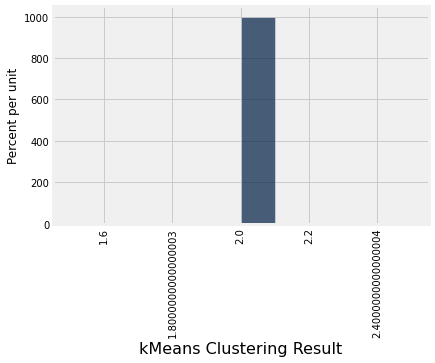

In [29]:
iris_C.where('species', are.equal_to('Iris-setosa')).hist('kMeans Clustering Result')

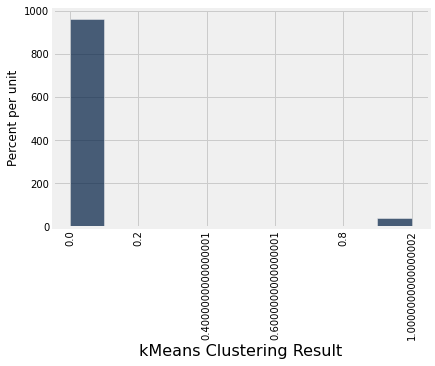

In [30]:
iris_C.where('species', are.equal_to('Iris-versicolor')).hist('kMeans Clustering Result')

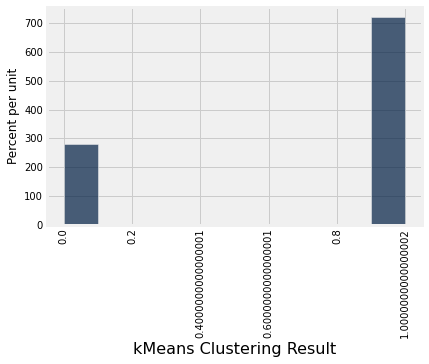

In [28]:
iris_C.where('species', are.equal_to('Iris-virginica')).hist('kMeans Clustering Result')

# Answer to Exercise 9:

Setosa is the only species in cluster 2. Almost 98% versicolor is in cluster 0, and 2% in cluster 1. Virginica has nearly 30% in cluster 0, and nearly 70% in cluster 1. 